In [1]:
#load data
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

data1, meta1 = loadarff('./data/banknotes.arff')
data2, meta2 = loadarff('./data/ionosphere.arff')
data3, meta3 = loadarff('./data/steel-plates-fault.arff')

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)


In [2]:
#prepare data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def prep_data(df):
    x = df.drop(df.columns[-1],axis=1)
    y = df[df.columns[-1]]
    x = x.to_numpy()
    y = le.fit_transform(y)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.5, random_state=88)
    return train_x,test_x,train_y,test_y

In [3]:
#print graphs
import matplotlib.pyplot as plt

scientific_values_list = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
tree_depth_list = [1,3,5,8,10]
c_list = [0.1,0.5,1.0,2.0,5.0]
mlp_alpha_list = [1e-5, 1e-3, 0.1, 10]

def print_graph(acc,title,xlabel):
    x_values = list(acc.keys())
    accuracy_scores = list(acc.values())
    if title.find("(KNN)") != -1:
        plt.xticks(np.arange(1, 20, 1))
    if title.find("(GaussianNB)") != -1:
        plt.xticks(scientific_values_list)
        plt.xscale('log')
    if title.find("(DT)") != -1 | title.find("(Gradient Boosted DTs)") != -1 | title.find("(Random Forest)") != -1:
        plt.xticks(tree_depth_list)
    if title.find("(LR)") != -1:
        plt.xticks(c_list)
    if title.find("(MLP)") != -1:
        plt.xticks(mlp_alpha_list)
        plt.xscale('log')
    plt.plot(x_values, accuracy_scores, marker='s')
    plt.title(f"{title}")
    plt.ylabel('Accuracy Score')
    plt.xlabel(f"{xlabel}")
    plt.grid(True)
    plt.show()



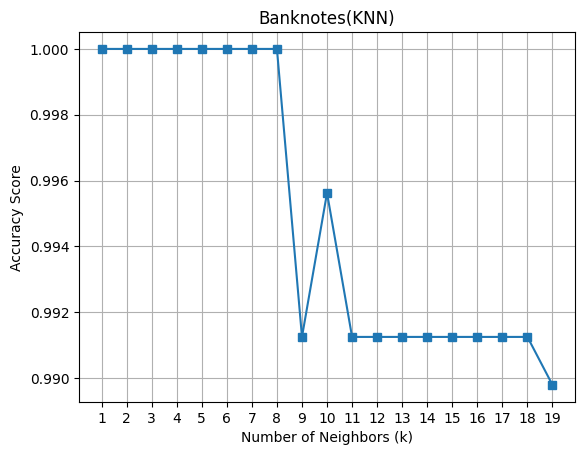

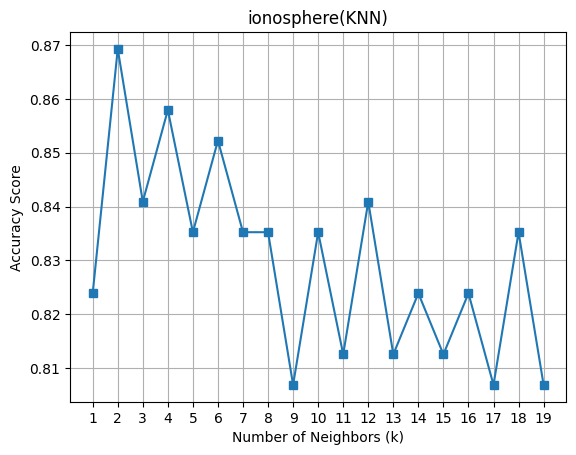

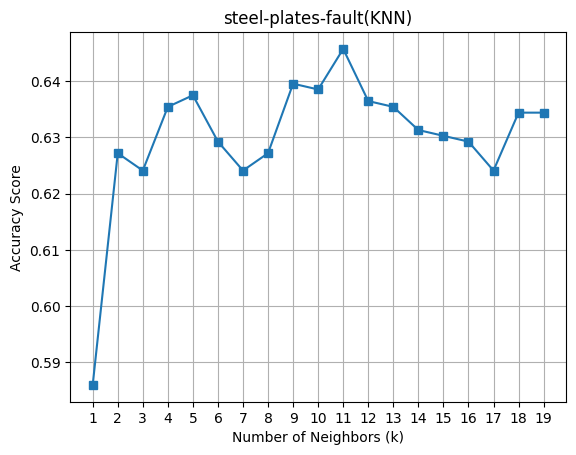

In [4]:
#KNeighborsClassifier (K nearest neighbours) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn_classifier(df):
    map = {}
    for k in range(1,20):
        train_x,test_x,train_y,test_y = prep_data(df)
        neigh = KNeighborsClassifier(n_neighbors = k)
        neigh.fit(train_x,train_y)
        predictions = neigh.predict(test_x)
        # print(f"typeofpre:{type(predictions)},typeoftest_x:{type(test_x)}")
        accuracy = accuracy_score(test_y, predictions)
        map[k] = accuracy
    return map


acc1 = knn_classifier(df1)
acc2 = knn_classifier(df2)
acc3 = knn_classifier(df3)

print_graph(acc1,"Banknotes(KNN)","Number of Neighbors (k)")
print_graph(acc2,"ionosphere(KNN)","Number of Neighbors (k)")
print_graph(acc3,"steel-plates-fault(KNN)","Number of Neighbors (k)")

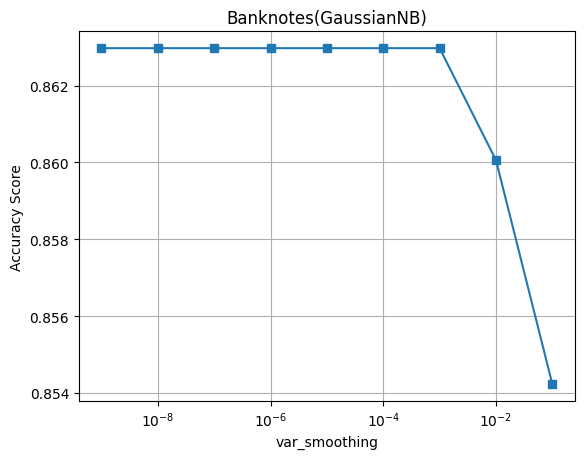

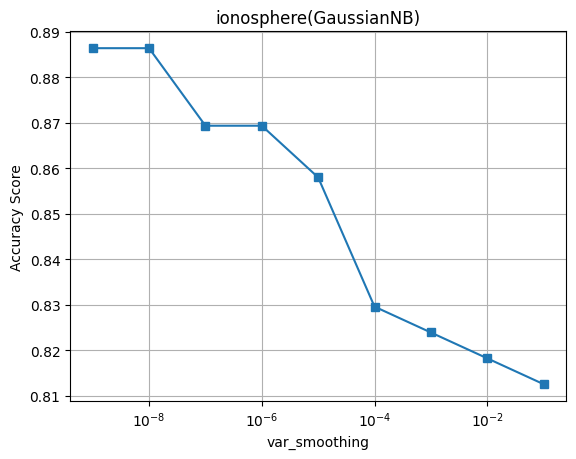

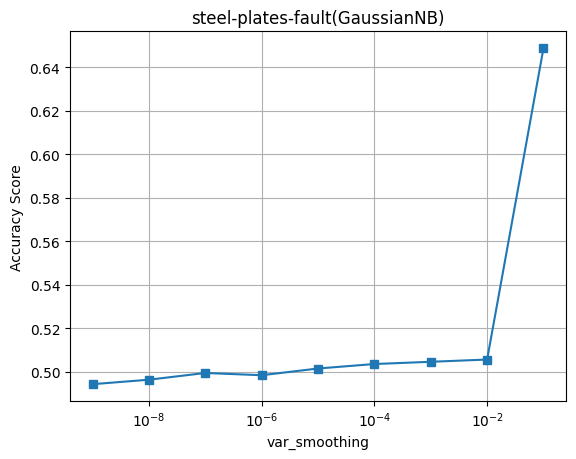

In [5]:
# GaussianNB (the Gaussian form of Naive Bayes)
from sklearn.naive_bayes import GaussianNB

def gaussiannb_classifier(df):
    map={}
    for v in scientific_values_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        clf = GaussianNB(var_smoothing=v)
        clf.fit(train_x,train_y)
        predictions = clf.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[v] = accuracy
    return map


acc1 = gaussiannb_classifier(df1)
acc2 = gaussiannb_classifier(df2)
acc3 = gaussiannb_classifier(df3)

print_graph(acc1,"Banknotes(GaussianNB)","var_smoothing")
print_graph(acc2,"ionosphere(GaussianNB)","var_smoothing")
print_graph(acc3,"steel-plates-fault(GaussianNB)","var_smoothing")


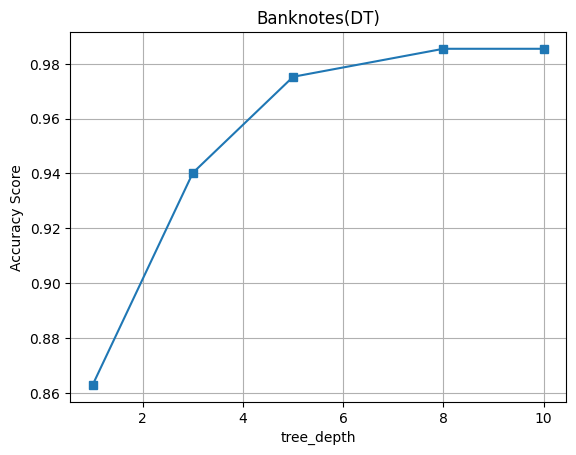

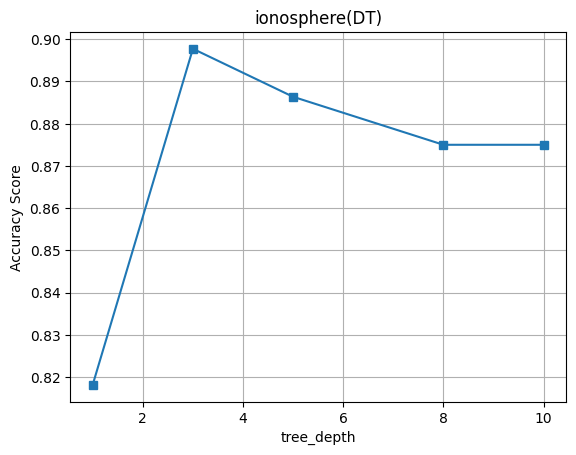

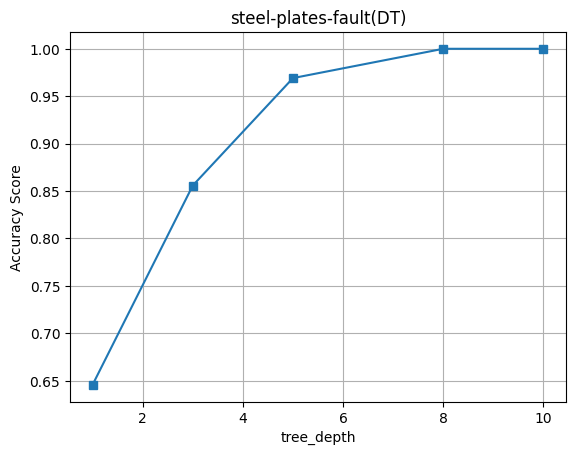

In [6]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classifier(df):
    map={}
    for d in tree_depth_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        dt_clf = DecisionTreeClassifier(max_depth=d, random_state=0)#possible random at each split before finding the best split among them
        dt_clf.fit(train_x, train_y)
        predictions = dt_clf.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[d] = accuracy
    return map


acc1 = decision_tree_classifier(df1)
acc2 = decision_tree_classifier(df2)
acc3 = decision_tree_classifier(df3)

print_graph(acc1,"Banknotes(DT)","tree_depth")
print_graph(acc2,"ionosphere(DT)","tree_depth")
print_graph(acc3,"steel-plates-fault(DT)","tree_depth")


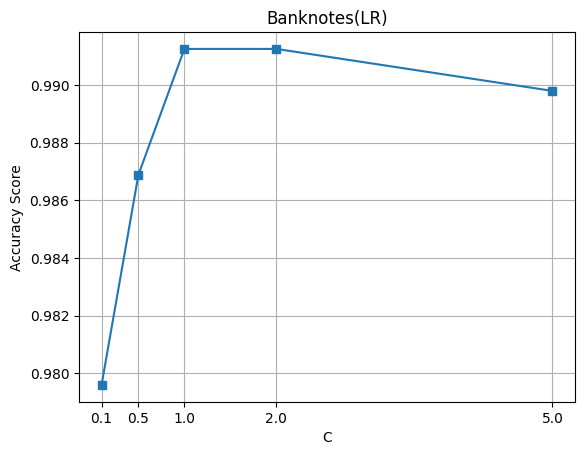

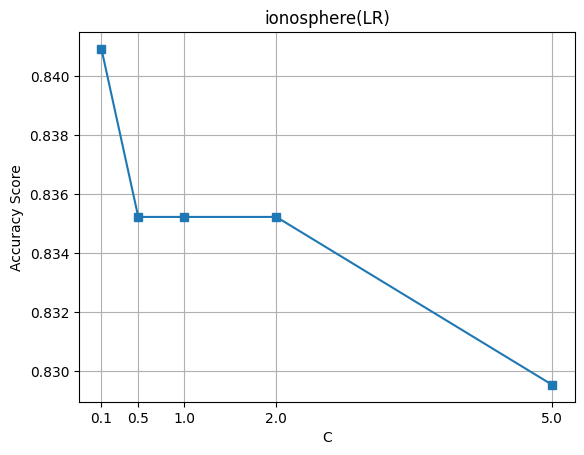

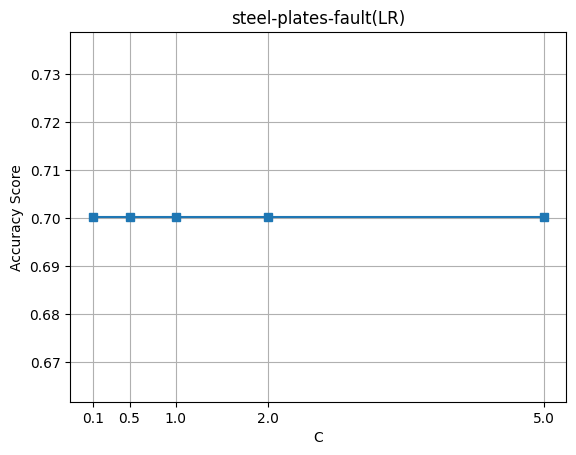

In [7]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

def logistic_regression(df):
    map = {}
    for c in c_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        logreg = LogisticRegression(C=c, max_iter=1200)
        logreg.fit(train_x, train_y)
        predictions = logreg.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[c] = accuracy
    return map


acc1 = logistic_regression(df1)
acc2 = logistic_regression(df2)
acc3 = logistic_regression(df3)

print_graph(acc1,"Banknotes(LR)","C")
print_graph(acc2,"ionosphere(LR)","C")
print_graph(acc3,"steel-plates-fault(LR)","C")

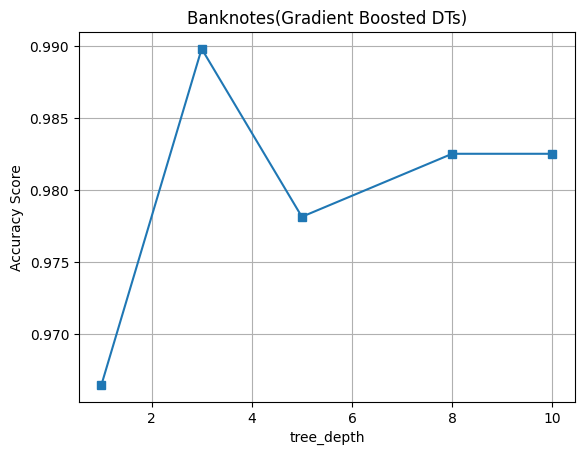

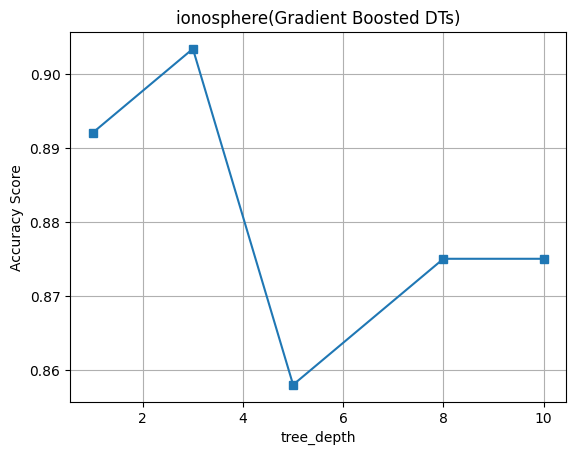

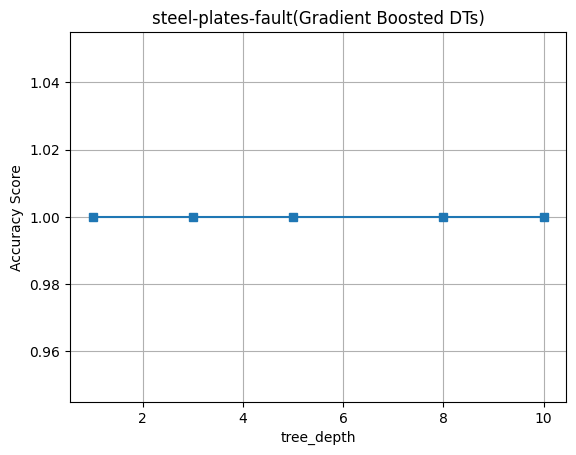

In [8]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting_classifier(df):
    map={}
    for d in tree_depth_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=d, random_state=0)
        gb_clf.fit(train_x, train_y)
        gb_clf.predict(test_x)
        predictions = gb_clf.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[d] = accuracy
    return map


acc1 = gradient_boosting_classifier(df1)
acc2 = gradient_boosting_classifier(df2)
acc3 = gradient_boosting_classifier(df3)

print_graph(acc1,"Banknotes(Gradient Boosted DTs)","tree_depth")
print_graph(acc2,"ionosphere(Gradient Boosted DTs)","tree_depth")
print_graph(acc3,"steel-plates-fault(Gradient Boosted DTs)","tree_depth")

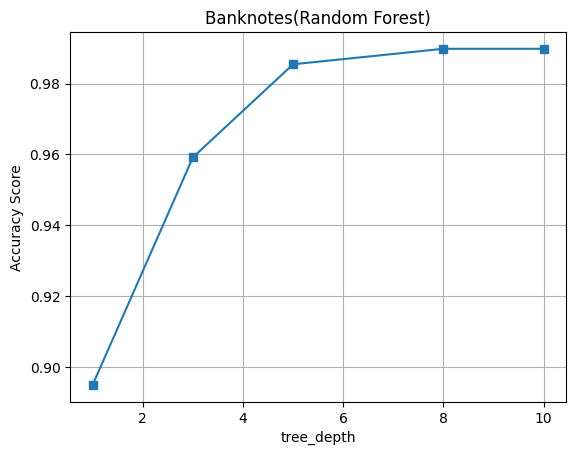

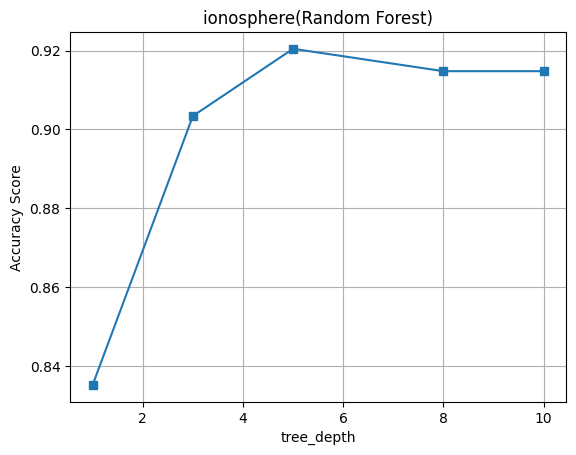

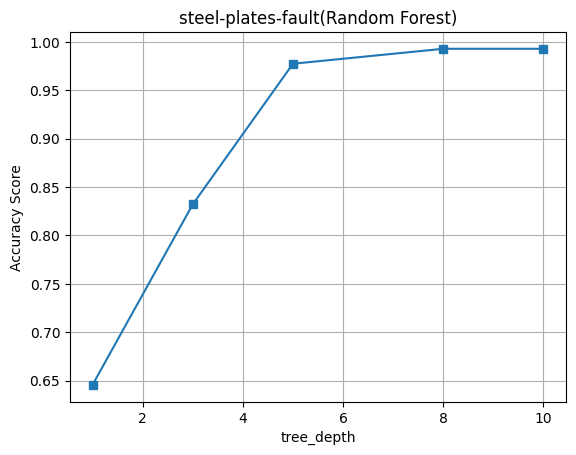

In [9]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
def random_forest_classifier(df):
    map = {}
    for d in tree_depth_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        rf_clf = RandomForestClassifier(n_estimators=500, max_depth=d, random_state=33)
        rf_clf.fit(train_x, train_y)
        predictions = rf_clf.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[d] = accuracy
    return map


acc1 = random_forest_classifier(df1)
acc2 = random_forest_classifier(df2)
acc3 = random_forest_classifier(df3)

print_graph(acc1,"Banknotes(Random Forest)","tree_depth")
print_graph(acc2,"ionosphere(Random Forest)","tree_depth")
print_graph(acc3,"steel-plates-fault(Random Forest)","tree_depth")

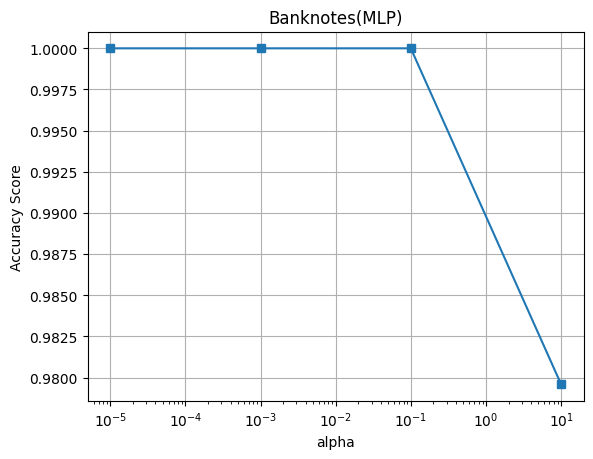

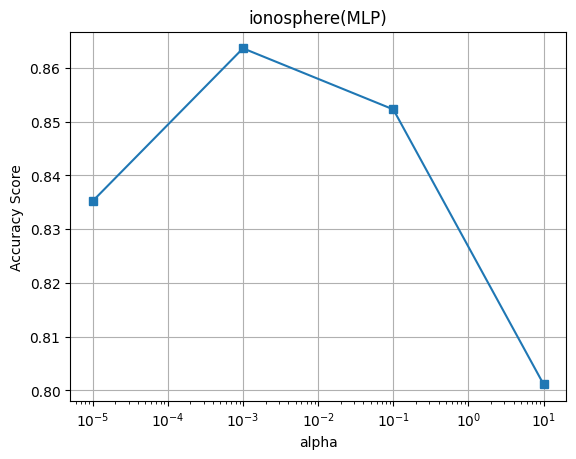

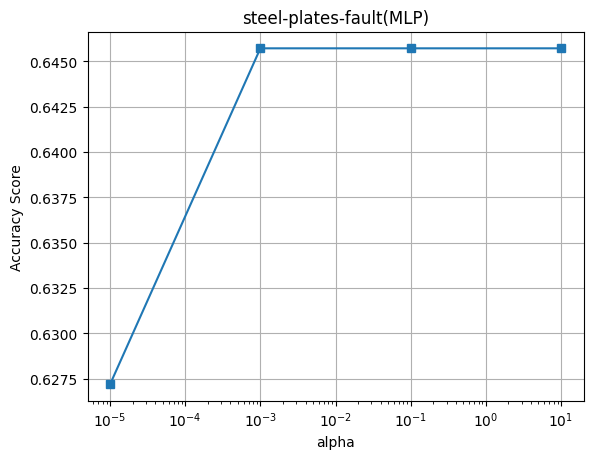

In [10]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

def neural_network(df):
    map = {}
    for a in mlp_alpha_list:
        train_x,test_x,train_y,test_y = prep_data(df)
        mlp_clf = MLPClassifier(random_state=0, max_iter=200,alpha=a, activation="logistic",solver='lbfgs')
        mlp_clf.fit(train_x, train_y)
        predictions = mlp_clf.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        map[a] = accuracy
    return map


acc1 = neural_network(df1)
acc2 = neural_network(df2)
acc3 = neural_network(df3)

print_graph(acc1,"Banknotes(MLP)","alpha")
print_graph(acc2,"ionosphere(MLP)","alpha")
print_graph(acc3,"steel-plates-fault(MLP)","alpha")